# **Task 1: Data extraction and initial analysis**

## **1. Importing Necessary Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## **2. Loading and Inspecting the Dataset**

In [2]:
# Load the manually extracted financial data
data = pd.read_csv(r"C:\Users\Dhruv Boricha\Downloads\Financial_report.csv")

# Display basic info
print("Dataset Information:")
print(data.info())

# View basic statistics
print("\nDataset Summary:")
print(data.describe())

# Quick preview
data.head()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Year                                 9 non-null      int64 
 1   Total Revenue                        9 non-null      int64 
 2   Net Income                           9 non-null      int64 
 3   Total Assets                         9 non-null      int64 
 4   Total Liabilities                    9 non-null      int64 
 5   Cash Flow from Operating Activities  9 non-null      int64 
 6   Company                              9 non-null      object
dtypes: int64(6), object(1)
memory usage: 636.0+ bytes
None

Dataset Summary:
              Year  Total Revenue    Net Income   Total Assets  \
count     9.000000       9.000000      9.000000       9.000000   
mean   2022.000000  217084.333333  58988.555556  268669.111111   
std       0.866025

,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities,Company
0,2023,211915,72361,411976,205753,87582,Microsoft
1,2022,198270,72738,364840,198298,89035,Microsoft
2,2021,168088,61271,333779,191791,76740,Microsoft
3,2023,96773,14974,106618,43009,13256,Tesla
4,2022,81462,12556,82338,36440,14724,Tesla


## **3. Data Cleaning and Preprocessing**

In [3]:
# Checking missing values
print("Missing values per column:")
print(data.isnull().sum())

# Filling missing values caused by percentage calculations later
data.fillna(0, inplace=True)

# Ensuring all numeric columns are correctly typed
numeric_cols = ['Total Revenue', 'Net Income', 'Total Assets', 'Total Liabilities', 'Cash Flow from Operating Activities']
data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Final quick check
data.info()

Missing values per column:
Year                                   0
Total Revenue                          0
Net Income                             0
Total Assets                           0
Total Liabilities                      0
Cash Flow from Operating Activities    0
Company                                0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Year                                 9 non-null      int64 
 1   Total Revenue                        9 non-null      int64 
 2   Net Income                           9 non-null      int64 
 3   Total Assets                         9 non-null      int64 
 4   Total Liabilities                    9 non-null      int64 
 5   Cash Flow from Operating Activities  9 non-null      int64 
 6   Company                              9 non-null 

## **4. Calculating Year-over-Year Growth Rates**

In [4]:
# Revenue and Net Income growth
data['Revenue Growth (%)'] = data.groupby('Company')['Total Revenue'].pct_change() * 100
data['Net Income Growth (%)'] = data.groupby('Company')['Net Income'].pct_change() * 100

# Assets, Liabilities, and Cash Flow growth
data['Assets Growth (%)'] = data.groupby('Company')['Total Assets'].pct_change() * 100
data['Liabilities Growth (%)'] = data.groupby('Company')['Total Liabilities'].pct_change() * 100
data['Cash Flow Growth (%)'] = data.groupby('Company')['Cash Flow from Operating Activities'].pct_change() * 100

# Replace NaN growth rates (first year) with 0
data.fillna(0, inplace=True)

# View updated data
data.head()

,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities,Company,Revenue Growth (%),Net Income Growth (%),Assets Growth (%),Liabilities Growth (%),Cash Flow Growth (%)
0,2023,211915,72361,411976,205753,87582,Microsoft,0.000000,0.000000,0.000000,0.000000,0.000000
1,2022,198270,72738,364840,198298,89035,Microsoft,-6.438902,0.520999,-11.441443,-3.623276,1.659017
2,2021,168088,61271,333779,191791,76740,Microsoft,-15.222676,-15.764800,-8.513595,-3.281425,-13.809176
3,2023,96773,14974,106618,43009,13256,Tesla,0.000000,0.000000,0.000000,0.000000,0.000000
4,2022,81462,12556,82338,36440,14724,Tesla,-15.821562,-16.147990,-22.772890,-15.273547,11.074231


## **5. Saving the Cleaned and Enriched Data**

In [5]:
# Save updated dataset
data.to_csv(r'C:\Users\Dhruv Boricha\Downloads\final_financial_data_report.csv', index=False)

## **6. Visualizing Trends**

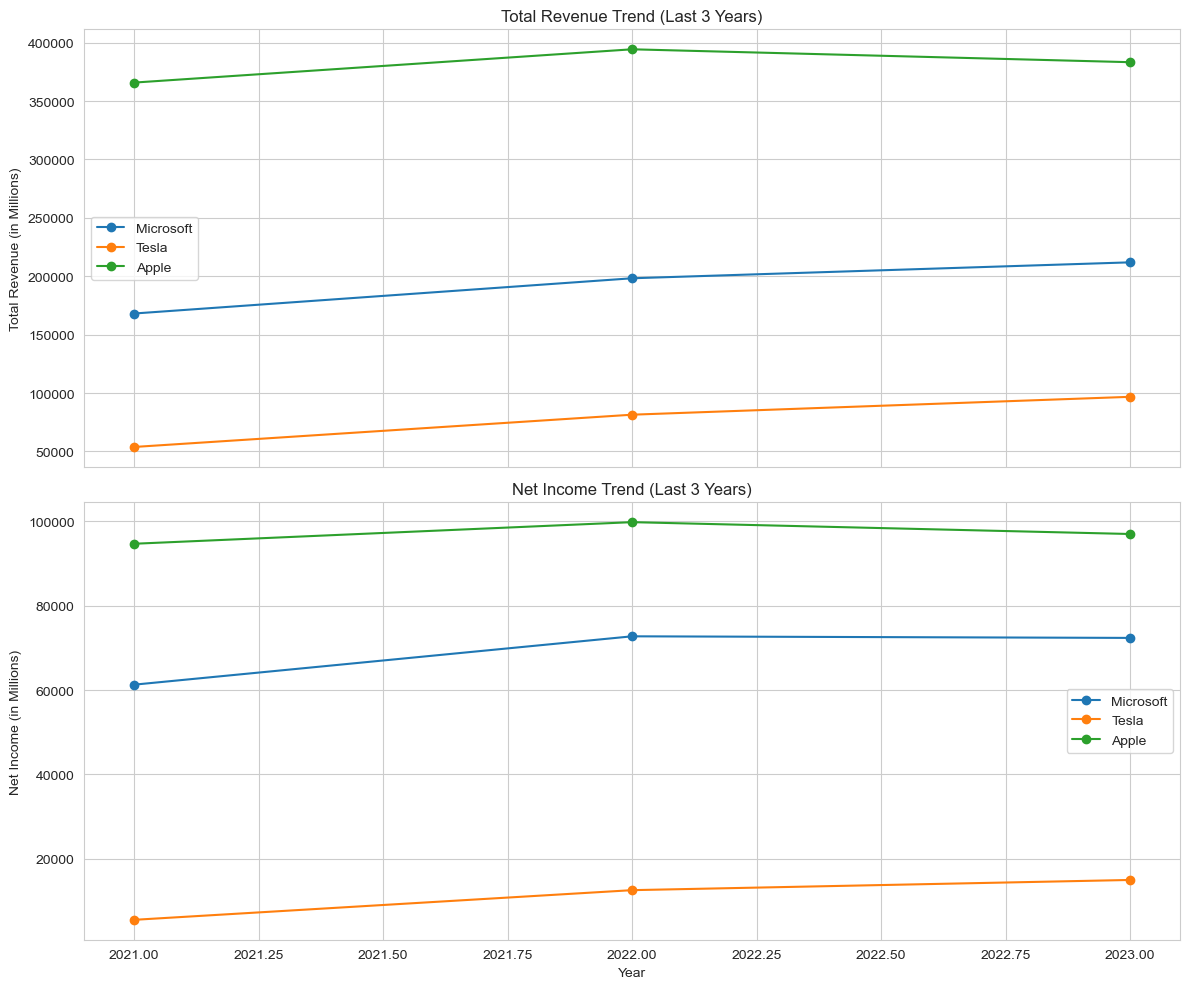

In [6]:
# Line Charts for Financial Metrics

# Set style
sns.set_style('whitegrid')

# Plot Revenue and Net Income Trends
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Revenue Trend
for company in data['Company'].unique():
    company_data = data[data['Company'] == company]
    axes[0].plot(company_data['Year'], company_data['Total Revenue'], marker='o', label=company)

axes[0].set_title('Total Revenue Trend (Last 3 Years)')
axes[0].set_ylabel('Total Revenue (in Millions)')
axes[0].legend()

# Net Income Trend
for company in data['Company'].unique():
    company_data = data[data['Company'] == company]
    axes[1].plot(company_data['Year'], company_data['Net Income'], marker='o', label=company)

axes[1].set_title('Net Income Trend (Last 3 Years)')
axes[1].set_ylabel('Net Income (in Millions)')
axes[1].set_xlabel('Year')
axes[1].legend()

plt.tight_layout()
plt.show()

## **7. Summarizing Findings**

In [7]:
# Overall Average Growth Rates

# Grouping by Company and calculating average growth
summary = data.groupby('Company').agg({
    'Revenue Growth (%)': 'mean',
    'Net Income Growth (%)': 'mean',
    'Assets Growth (%)': 'mean',
    'Liabilities Growth (%)': 'mean',
    'Cash Flow Growth (%)': 'mean'
}).round(2)

print("Year-By-Year Average Growth Rates (%):")
display(summary)

# Save summary
summary.to_csv(r'C:\Users\Dhruv Boricha\Downloads\Summary_financial_report.csv')

Year-By-Year Average Growth Rates (%):


,Revenue Growth (%),Net Income Growth (%),Assets Growth (%),Liabilities Growth (%),Cash Flow Growth (%)
Company,,,,,
Apple,-1.45,-0.75,-0.15,-0.23,-1.44
Microsoft,-7.22,-5.08,-6.65,-2.30,-4.05
Tesla,-16.58,-24.06,-15.77,-10.48,-3.61
